In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json

with open("books_1.Best_Books_Ever.csv", encoding="utf-8") as f:
    df = pd.read_csv(f)

In [7]:
df['pages'] = pd.to_numeric(df['pages'], downcast='integer', errors='coerce') #Gjør 'pages' kolonnen om til int, slik at jeg kan finne gjennomsnitt
print(f"Gjennomsnittlig sidetall: {int(df['pages'].mean())}") #Tar gjennomsnittet av 'pages' kolonnen med pandas

Gjennomsnittlig sidetall: 328


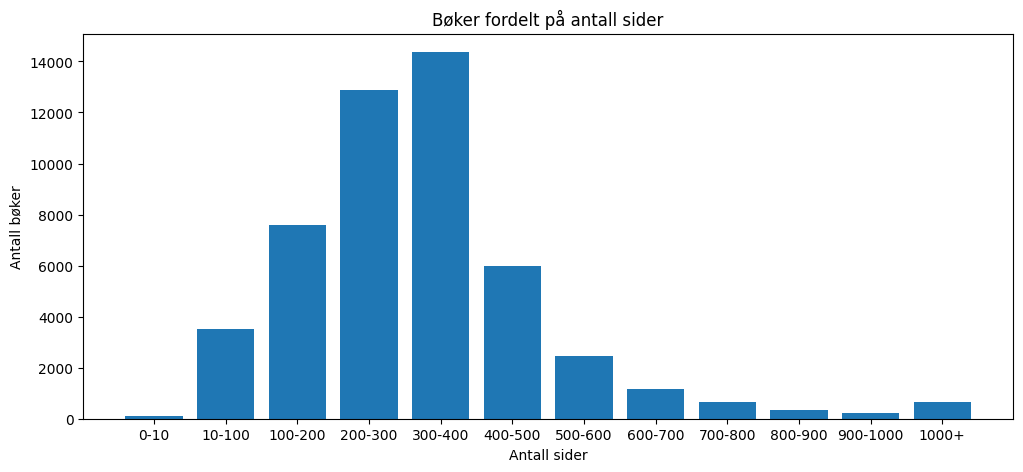

In [10]:
bins = [0, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float("inf")]
labels = ["0-10", "10-100", "100-200", "200-300", "300-400", "400-500", "500-600", "600-700", "700-800", "800-900", "900-1000", "1000+"]

df['category'] = pd.cut(df['pages'], bins=bins, labels=labels, right=True) #Bruker pandas bins til å sortere (cut) 'pages' kolonnen inn i kategorier
page_counts = df['category'].value_counts().reindex(labels, fill_value=0) #Teller antall bøker i hvert bin i variabelen df['category]

plt.figure(figsize=(12,5))
plt.bar(labels, page_counts)
plt.xlabel("Antall sider")
plt.ylabel("Antall bøker")
plt.title("Bøker fordelt på antall sider")
plt.show()


In [16]:
#Fordi sjangere er i lister formattert som strings, bruker jeg json.loads for å gjøre dem om til lister. For å gjøre dette må jeg først formattere det med hermetegn i stedet for apostrofer. 
genresLists = df['genres'].str.replace("'", '"').apply(json.loads)
allGenres = genresLists.explode() #Explode betyr at hver sjanger i listen får sin egen rad, slik at jeg kan bruke value_counts
popularity =  allGenres.value_counts().reset_index() #Teller hvor mange ganger hver sjanger forekommer, gjør det om til en dataframe
popularity.columns = ["Genre", "Works"]
print(popularity.head(10).to_string(index=False)) #Printer de 10 mest populære sjangrene, uten indekskolonnen

             Genre  Works
           Fiction  31638
           Romance  15495
           Fantasy  15046
       Young Adult  11869
      Contemporary  10520
        Nonfiction   8251
             Adult   8246
            Novels   7805
           Mystery   7702
Historical Fiction   7665


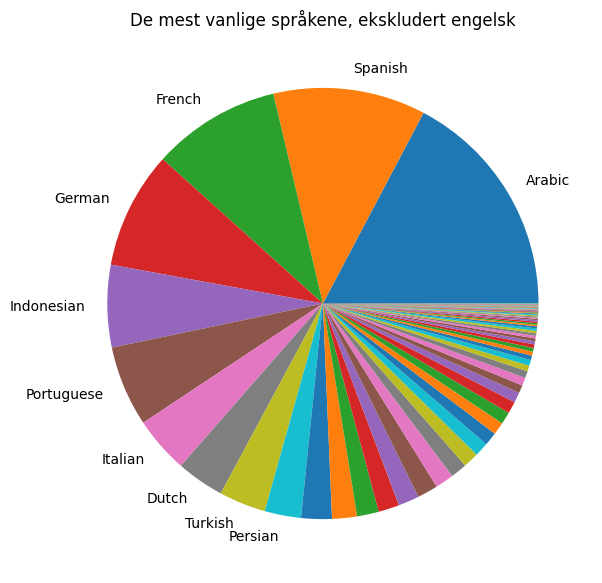

In [34]:
plt.figure(figsize=(7,7))
languages = df['language'].value_counts().reset_index().iloc[1:]
languages.columns = ["Language", "Works"]
labels = languages["Language"].tolist()
labels[10:] = [""]*len(labels[10:])

plt.pie(languages["Works"], labels=labels)
plt.title("De mest vanlige språkene, ekskludert engelsk")
plt.show()
